## Classification

Labeled Faces in the Wild

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, cross_validate, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_lfw_people
lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
lfw.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [4]:
X = lfw.data
y = lfw.target

img_height = lfw.images.shape[1]
img_width = lfw.images.shape[2]
print('height', img_height, 'width', img_width)

height 50 width 37


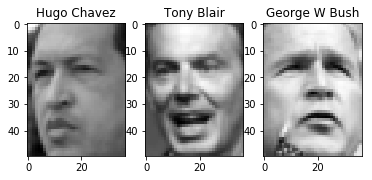

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax.flatten()

for i in range(3):
    ax[i].imshow(lfw.images[i], cmap='gray')
    ax[i].set_title(lfw.target_names[lfw.target[i]])

(1288, 2)
(77,) (77,)
(236,) (236,)
0 Ariel Sharon
1 Colin Powell
2 Donald Rumsfeld
3 George W Bush
4 Gerhard Schroeder
5 Hugo Chavez
6 Tony Blair


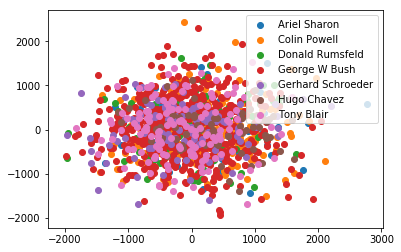

In [6]:
# plot the pixels reduced to 2-d and then colour code based
# on person
pca = PCA(n_components=2)

Z = pca.fit_transform(X) # Z is 2-D
print(Z.shape)

# all the rows for Ariel Sharon
print(Z[y==0, 0].shape, Z[y==0, 1].shape)
print(Z[y==1, 0].shape, Z[y==1, 1].shape)

# plot Z[0] vs Z[1], with colouring for each person
fig, ax = plt.subplots()

for i in range(len(lfw.target_names)):
    print(i, lfw.target_names[i])
    # scatter plot each target's subset of Z
    ax.scatter(Z[y==i, 0], Z[y==i, 1], label=lfw.target_names[i])

ax.legend()

0 Donald Rumsfeld
1 Colin Powell


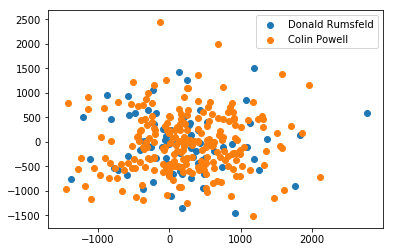

In [7]:
# plot only 2 people
%matplotlib inline

fig, ax = plt.subplots()

people = ['Donald Rumsfeld', 'Colin Powell']

for i in range(len(people)):
    print(i, people[i])
    # scatter plot each target's subset of Z
    ax.scatter(Z[y==i, 0], Z[y==i, 1], label=people[i])

ax.legend()

## Logistic Regression with Gradient Descent

- cross validation
- learning curve

In [8]:
from sklearn.linear_model import SGDClassifier

# For best results using the default learning rate schedule,
# the data should have zero mean and unit variance.

# train-test-split first so that we can fit X_scaler using
# only training set (otherwise test set can corrupt scaler)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Scale X (2 steps: fit, transform)
X_scaler = StandardScaler()
X_scaler.fit(X_train) # Note: NOT X_scaler.fit(X) which includes X_test!

Z_train = X_scaler.transform(X_train)
Z_test = X_scaler.transform(X_test)

# If you choose to do PCA, here's where you can add it
# to reduce 1850 dimensions to e.g. 300

In [9]:
# cross validation
model = SGDClassifier(max_iter=1000, tol=1e-3)

scores1 = cross_validate(model, Z_train, y_train, cv=5,
                        return_train_score=True, return_estimator=True)

# Note: 'test_score' is actually the validation_score
# we didn't use X_test or y_test in cross_validate?
scores1

{'fit_time': array([0.41773057, 0.46116233, 0.38504529, 0.41675806, 0.41604066]),
 'score_time': array([0.00811648, 0.        , 0.        , 0.        , 0.        ]),
 'estimator': (SGDClassifier(alpha=0.0001, average=False, class_weight=None,
         early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
         l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
         n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
         power_t=0.5, random_state=None, shuffle=True, tol=0.001,
         validation_fraction=0.1, verbose=0, warm_start=False),
  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
         early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
         l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
         n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
         power_t=0.5, random_state=None, shuffle=True, tol=0.001,
         validation_fraction=0.1, verbose=0, warm_start

In [10]:
train_sizes, train_scores, val_scores = learning_curve(model, 
                                                       Z_train,
                                                       y_train,
                                                       cv=3)

In [11]:
# accuracy scores on val show a slight overfitting
# last score went down from 0.813 to 0.807
#
# Note: R2 does not apply here because this is a classification
# model / problem (R2 is only for regression)
val_scores.mean(axis=1) 

array([0.47303908, 0.68611625, 0.74422463, 0.79707944, 0.80132583])

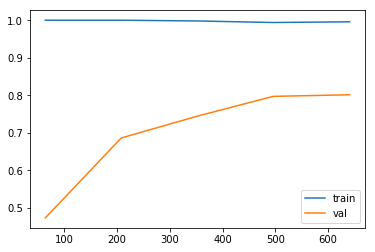

In [12]:
# plot average (over 3-folds) train_scores vs. train_sizes
# plot average (over 3-folds) val_scores vs. train_sizes

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores.mean(axis=1), label='train')
ax.plot(train_sizes, val_scores.mean(axis=1), label='val')
ax.legend()

## Support Vector Machine (SVM)

- cross validation
- learning curve

In [29]:
from sklearn.svm import SVC

model_svc = SVC(gamma=0.001, C=10)
scores = cross_validate(model_svc, Z_train, y_train, cv=5,
                        return_train_score=True,
                        return_estimator=True)
scores

{'fit_time': array([3.21671963, 3.33145428, 3.41180158, 3.39028621, 3.31303   ]),
 'score_time': array([0.38369703, 0.38513494, 0.40106964, 0.3854959 , 0.36539721]),
 'estimator': (SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),
  SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),
  SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),
  SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='r

In [30]:
# How to get the best estimator from the above scores
best_estimator = scores['estimator'][2]

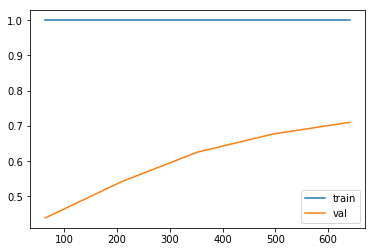

In [31]:
train_sizes, train_scores, val_scores = learning_curve(model_svc, 
                                                       Z_train,
                                                       y_train,
                                                       cv=3)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores.mean(axis=1), label='train')
ax.plot(train_sizes, val_scores.mean(axis=1), label='val')
ax.legend()

## Evaluation Metrics

- Confusion Matrix
- Precision / Recall

In [32]:
# Exercise:
# Pick any of the above models (logistic or SVC) to
# compute classification report and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get metrics on the test set
# 1. Get predictions on X_test => y_pred
# 2. Compare y_test and y_pred for your metrics

# get models from cross_validate result
print('validation scores (svc)', scores['test_score'])
print('validation scores (lr)', scores1['test_score'])

# based on validation scores, best model is at index 1 for both
svc = scores['estimator'][1] # SVC
lr = scores1['estimator'][1] # logistic regression + sgd

# Get predictions on X_test => y_pred
# Need to use the scaled version of X_test (Z_test)
# because model is trained using scaled version of X_train
y_pred = svc.predict(Z_test) # Note: X_test is unscaled
y_pred_lr = lr.predict(Z_test)

# Compare y_test and y_pred for your metrics
print(svc)
print(classification_report(y_test, y_pred,
                            target_names=lfw.target_names))

print(lr)
print(classification_report(y_test, y_pred_lr,
                            target_names=lfw.target_names))


validation scores (svc) [0.72588832 0.69230769 0.76683938 0.72774869 0.77894737]
validation scores (lr) [0.79695431 0.81538462 0.8238342  0.79581152 0.82631579]
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.42      0.59        19
     Colin Powell       0.87      0.78      0.82        60
  Donald Rumsfeld       0.88      0.50      0.64        28
    George W Bush       0.66      0.98      0.79       133
Gerhard Schroeder       0.79      0.41      0.54        27
      Hugo Chavez       0.86      0.27      0.41        22
       Tony Blair       0.76      0.58      0.66        33

        micro avg       0.73      0.73      0.73       322
        macro avg       0.83      0.56      0.64       322
     weighted avg       

### Demo: ROC curve for Multi-class classifier

Based on: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [33]:
import numpy as np
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

labels = np.arange(len(lfw.target_names))

y_bin = label_binarize(y, classes=labels)
n_classes = y_bin.shape[1]

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin)

X_scaler_bin = StandardScaler()
Z_train_bin = X_scaler_bin.fit_transform(X_train_bin)
Z_test_bin = X_scaler_bin.transform(X_test_bin)

# Make a copy of the settings of our best model (e.g. lr)
# update it to return probabilities
model_prob = clone(lr)
model_prob.probability = True # Computing ROC needs probabilities

# Learn to predict each class against the other
classifier = OneVsRestClassifier(model_prob)
y_score = classifier.fit(Z_train_bin, y_train_bin).decision_function(Z_test_bin)

In [48]:
lfw.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [47]:
labels

array([0, 1, 2, 3, 4, 5, 6])

In [46]:
y_binn=pd.DataFrame(y_bin)
y_binn

,0,1,2,3,4,5,6
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0
7,0,0,0,0,1,0,0
8,0,0,0,1,0,0,0
9,1,0,0,0,0,0,0


In [18]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [56]:
fpr

{0: array([0.        , 0.00325733, 0.00325733, 0.00651466, 0.00651466,
        0.01954397, 0.01954397, 0.0228013 , 0.0228013 , 0.04234528,
        0.04234528, 0.05863192, 0.05863192, 0.06840391, 0.06840391,
        0.08794788, 0.08794788, 0.49511401, 0.49511401, 0.51791531,
        0.51791531, 1.        ]),
 1: array([0.        , 0.        , 0.00371747, 0.00371747, 0.01115242,
        0.01115242, 0.01486989, 0.01486989, 0.01858736, 0.01858736,
        0.02973978, 0.02973978, 0.04089219, 0.04089219, 0.04832714,
        0.04832714, 0.0669145 , 0.0669145 , 0.07434944, 0.07434944,
        0.07806691, 0.07806691, 0.08178439, 0.08178439, 0.0929368 ,
        0.0929368 , 0.12639405, 0.12639405, 0.13011152, 0.13011152,
        0.17843866, 0.17843866, 0.37546468, 0.37546468, 1.        ]),
 2: array([0.        , 0.00348432, 0.00348432, 0.00696864, 0.00696864,
        0.01045296, 0.01045296, 0.01393728, 0.01393728, 0.0174216 ,
        0.0174216 , 0.02090592, 0.02090592, 0.02439024, 0.02439024,
   

In [55]:
tpr

{0: array([0.        , 0.        , 0.26666667, 0.26666667, 0.33333333,
        0.33333333, 0.46666667, 0.46666667, 0.6       , 0.6       ,
        0.66666667, 0.66666667, 0.73333333, 0.73333333, 0.8       ,
        0.8       , 0.86666667, 0.86666667, 0.93333333, 0.93333333,
        1.        , 1.        ]),
 1: array([0.        , 0.01886792, 0.01886792, 0.41509434, 0.41509434,
        0.58490566, 0.58490566, 0.69811321, 0.69811321, 0.75471698,
        0.75471698, 0.79245283, 0.79245283, 0.81132075, 0.81132075,
        0.83018868, 0.83018868, 0.8490566 , 0.8490566 , 0.86792453,
        0.86792453, 0.88679245, 0.88679245, 0.90566038, 0.90566038,
        0.9245283 , 0.9245283 , 0.94339623, 0.94339623, 0.96226415,
        0.96226415, 0.98113208, 0.98113208, 1.        , 1.        ]),
 2: array([0.        , 0.        , 0.22857143, 0.22857143, 0.25714286,
        0.25714286, 0.31428571, 0.31428571, 0.42857143, 0.42857143,
        0.45714286, 0.45714286, 0.48571429, 0.48571429, 0.57142857,
   

In [54]:
roc_auc

{0: 0.9083604777415852,
 1: 0.9683664164971593,
 2: 0.9627675460428073,
 3: 0.9356540505974981,
 4: 0.9581028598328822,
 5: 0.994281045751634,
 6: 0.9262315578894723,
 'micro': 0.9570489821637541,
 'macro': 0.9520429472719321}

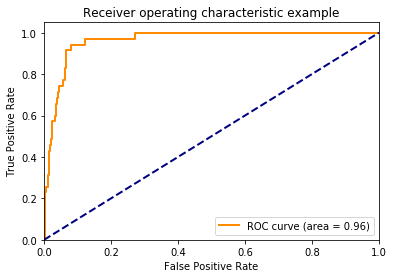

In [34]:
plt.figure()
lw = 2

# Class 2: Donald Rumsfeld
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

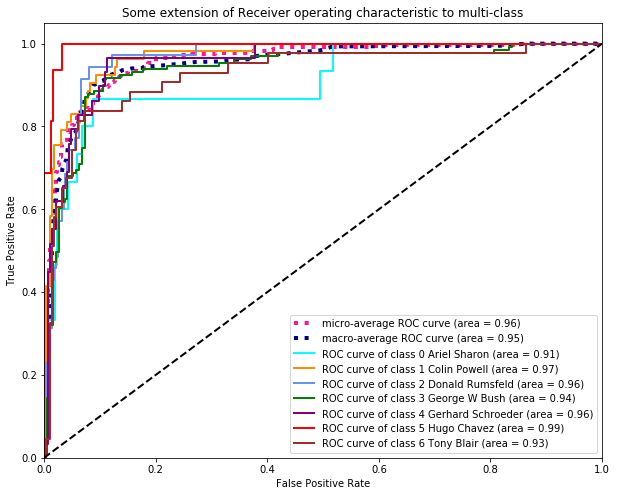

In [35]:
from scipy import interp
from itertools import cycle

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue',
                'green', 'purple', 'red', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} {1} (area = {2:0.2f})'
             ''.format(i, lfw.target_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [36]:
y_pred_ovr = classifier.predict(Z_test_bin) # ovr = one-vs-rest

# AUC is over optimistic, compared to F1
print(classification_report(y_test_bin, y_pred_ovr,
                           target_names=lfw.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.82      0.45      0.58        20
     Colin Powell       0.89      0.89      0.89        44
  Donald Rumsfeld       0.70      0.58      0.64        36
    George W Bush       0.87      0.74      0.80       140
Gerhard Schroeder       0.59      0.30      0.40        33
      Hugo Chavez       0.71      0.62      0.67         8
       Tony Blair       0.90      0.63      0.74        41

        micro avg       0.83      0.66      0.74       322
        macro avg       0.78      0.60      0.67       322
     weighted avg       0.82      0.66      0.73       322
      samples avg       0.64      0.66      0.65       322



C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


## K-nearest neighbours

* K-nearest neighbours looks at the nearest k neighbouring samples to decide what class the input sample should be

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# k (number of neighbours) is tunable,
# so let's use GridSearchCV to find it

params = {
    'n_neighbors': np.arange(5, 16, 2)
}

# KNN can be sped up by setting n_jobs to run the distance
# computation in parallel
model = KNeighborsClassifier(n_jobs=4)

gs_kn = GridSearchCV(model, params, cv=3, n_jobs=4)
gs_kn.fit(Z_train, y_train)

y_pred = gs_kn.predict(Z_test)
print(gs_kn.best_params_)
print(gs_kn.best_score_)
print(classification_report(y_test, y_pred,
                            target_names=lfw.target_names))

C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 11}
0.5786749482401656
                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.21      0.31        19
     Colin Powell       0.53      0.73      0.62        60
  Donald Rumsfeld       0.39      0.32      0.35        28
    George W Bush       0.62      0.91      0.74       133
Gerhard Schroeder       0.60      0.11      0.19        27
      Hugo Chavez       1.00      0.18      0.31        22
       Tony Blair       0.83      0.15      0.26        33

        micro avg       0.59      0.59      0.59       322
        macro avg       0.65      0.37      0.40       322
     weighted avg       0.63      0.59      0.53       322



In [23]:
# Could plot the learning curve for the n_neighbors=13 classifier
# But no point because it's not performing well anyway

In [38]:
# Try with PCA because our dataset is pixels so maybe
# PCA will summarise multiple pixels into each feature

params = {
    'n_neighbors': np.arange(5, 16, 2)
}

model = KNeighborsClassifier(n_jobs=4)

pca = PCA(n_components=300)
pca.fit(Z_train)
Z_train_pca = pca.transform(Z_train)
Z_test_pca = pca.transform(Z_test)

gs_kn = GridSearchCV(model, params, cv=3, n_jobs=4)
gs_kn.fit(Z_train_pca, y_train)

y_pred = gs_kn.predict(Z_test_pca)
print(gs_kn.best_params_)
print(gs_kn.best_score_)
print(classification_report(y_test, y_pred,
                            target_names=lfw.target_names))

# Result: no improvement at all!
# Reason is that classes are overlapping by too much
# (the nearest neighbours contain a mixture of many classes)

{'n_neighbors': 11}
0.5797101449275363
                   precision    recall  f1-score   support

     Ariel Sharon       0.60      0.16      0.25        19
     Colin Powell       0.54      0.75      0.63        60
  Donald Rumsfeld       0.36      0.32      0.34        28
    George W Bush       0.62      0.91      0.74       133
Gerhard Schroeder       0.60      0.11      0.19        27
      Hugo Chavez       1.00      0.18      0.31        22
       Tony Blair       0.83      0.15      0.26        33

        micro avg       0.59      0.59      0.59       322
        macro avg       0.65      0.37      0.39       322
     weighted avg       0.63      0.59      0.53       322



C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Naive Bayes

Naive Bayes uses the Bayes Theorem (multiplication if the probabilities of X) to compute the probability of y.

In [39]:
from sklearn.naive_bayes import GaussianNB

scores_nb = cross_validate(GaussianNB(), Z_train, y_train, cv=5,
                           return_train_score=False, return_estimator=True)

print('validation scores', scores_nb['test_score'])

validation scores [0.44162437 0.41538462 0.51813472 0.46596859 0.4       ]


In [40]:
# from validation scores, best estimator is at index 3
y_pred = scores_nb['estimator'][3].predict(Z_test)
print(classification_report(y_test, y_pred,
                            target_names=lfw.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.22      0.37      0.27        19
     Colin Powell       0.52      0.55      0.53        60
  Donald Rumsfeld       0.61      0.39      0.48        28
    George W Bush       0.84      0.57      0.68       133
Gerhard Schroeder       0.24      0.22      0.23        27
      Hugo Chavez       0.26      0.45      0.33        22
       Tony Blair       0.30      0.48      0.37        33

        micro avg       0.49      0.49      0.49       322
        macro avg       0.43      0.43      0.41       322
     weighted avg       0.58      0.49      0.52       322



In [41]:
# Try with PCA

pca = PCA(n_components=300)
pca.fit(Z_train)
Z_train_pca = pca.transform(Z_train)
Z_test_pca = pca.transform(Z_test)

scores_nb = cross_validate(GaussianNB(), Z_train_pca, y_train, cv=5,
                           return_train_score=False, return_estimator=True)

print('validation scores', scores_nb['test_score'])

validation scores [0.62436548 0.49230769 0.5492228  0.55497382 0.54736842]


In [42]:
# from validation scores, best estimator is at index 0
y_pred = scores_nb['estimator'][0].predict(Z_test_pca)
print(classification_report(y_test, y_pred,
                            target_names=lfw.target_names))

# Overall Naive Bayes performs better with PCA
# because it is based on computing probabilities of each feature
#
# When we use all 1850 features, each feature is just 1 pixel
# and carries less information than the projected 300 features.
# (intuitively...)

                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.37      0.47        19
     Colin Powell       0.49      0.77      0.60        60
  Donald Rumsfeld       0.64      0.57      0.60        28
    George W Bush       0.71      0.80      0.75       133
Gerhard Schroeder       0.80      0.44      0.57        27
      Hugo Chavez       0.83      0.23      0.36        22
       Tony Blair       0.82      0.55      0.65        33

        micro avg       0.65      0.65      0.65       322
        macro avg       0.70      0.53      0.57       322
     weighted avg       0.69      0.65      0.64       322

